In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'PEMFType': np.repeat(['sham','PEMF1h','PEMF2h','PEMF4h'],20), 'BMD': [4.51, 7.95, 4.97, 3.00, 7.97, 2.23, 3.95, 5.64, 9.35, 6.52, 4.96, 6.10, 7.19, 4.03, 2.72, 9.19, 5.17, 5.70, 5.85, 6.45, 5.32, 6.00, 5.12, 7.08, 5.48, 6.52, 4.09, 6.28, 7.77, 5.68, 8.47, 4.58, 4.11, 5.72, 5.91, 6.89, 6.99, 4.98, 9.94, 6.38, 4.73, 5.81, 5.69, 3.86 ,4.06, 6.56, 8.34, 3.01, 6.71, 6.51, 1.70, 5.89, 6.55, 5.34, 5.88, 7.50, 3.28, 5.38, 7.30, 5.46, 7.03, 4.65, 6.65, 5.49, 6.98, 4.85, 7.26, 5.92, 5.58, 7.91, 4.90, 4.54, 8.18, 5.42, 6.03, 7.04, 5.17, 7.60, 7.90, 7.91]})

In [3]:
df

,PEMFType,BMD
0,sham,4.51
1,sham,7.95
2,sham,4.97
3,sham,3.00
4,sham,7.97
...,...,...
75,PEMF4h,7.04
76,PEMF4h,5.17
77,PEMF4h,7.60
78,PEMF4h,7.90


In [4]:
from statsmodels.formula.api import ols # Require patsy version 5.0.1+ 
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
mod = ols('BMD ~ PEMFType', df).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

            df      sum_sq   mean_sq         F    PR(>F)
PEMFType   3.0   10.043504  3.347835  1.297941  0.281326
Residual  76.0  196.030085  2.579343       NaN       NaN


C:\Users\2543b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\2543b\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\2543b\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\2543b\anaconda3\lib\site-packages\

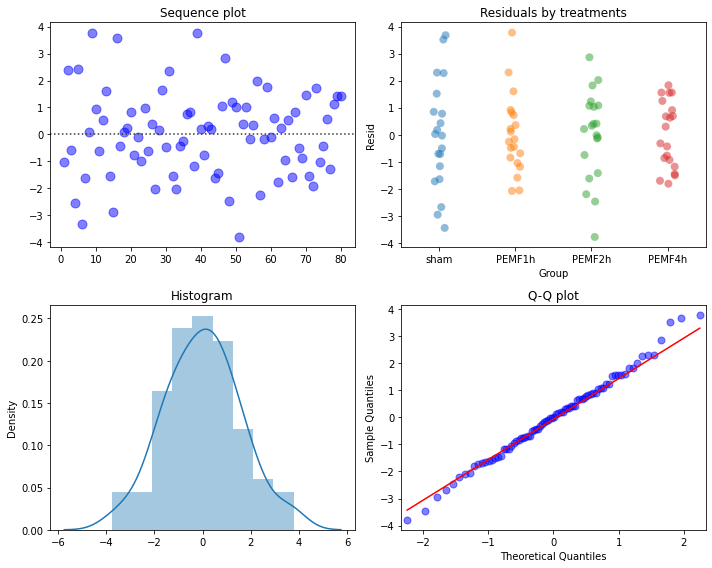

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def check_anova_normality(group, x):

    kws = dict(color='blue', marker='o', markersize=7, alpha=0.5)
    sns1_kws = dict(color='blue', marker='o', s=80, alpha=0.5)
    sns2_kws = dict(marker='o', s=8, alpha=0.5)

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, ax=ax1, scatter_kws=sns1_kws) # color='blue', ax=ax1, scatter_kws=sns1_kws)
    #sns.scatterplot(np.linspace(1,n,n), x, ax=ax1, **sns1_kws) 
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2, **sns2_kws) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')


    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4, **kws)
    ax4.set_title('Q-Q plot')
    plt.tight_layout()
    
check_anova_normality(df['PEMFType'], mod.resid)

In [6]:
ReactTime_data = pd.DataFrame({'ReactionTime': [8,7,1,7,3,11,2,7,3,8,4,9,10,1,5,6,8,6,6,10,4,2,3,8,8],
                         'Ingredient': ['A','B','D','C','E','C','E','A','D','B','B','A','C','E','D','D','C','E','B','A','E','D','B','A','C'],
                         'Bacth': np.repeat(['1','2','3','4','5'],5), 
                         'Day': ['1','2','3','4','5']*5})

In [7]:
ReactTime_data

,ReactionTime,Ingredient,Bacth,Day
0,8,A,1,1
1,7,B,1,2
2,1,D,1,3
3,7,C,1,4
4,3,E,1,5
5,11,C,2,1
6,2,E,2,2
7,7,A,2,3
8,3,D,2,4
9,8,B,2,5


In [8]:
from scipy import stats
# Compute variables
a = len(ReactTime_data.Bacth.unique())
b = len(ReactTime_data.Day.unique())

total_y = sum(ReactTime_data.ReactionTime)
SST = sum(ReactTime_data.ReactionTime**2) - (total_y**2)/(a*b)
# Compute SS terms
ydot_i = ReactTime_data.groupby('Bacth').aggregate({'ReactionTime':'sum'}).ReactionTime
ydot_j = ReactTime_data.groupby('Day').aggregate({'ReactionTime':'sum'}).ReactionTime
ydot_treat = ReactTime_data.groupby('Ingredient').aggregate({'ReactionTime':'sum'}).ReactionTime

SSTr = sum(ydot_treat**2)/b - (total_y**2)/(a*b)
SSRow = sum(ydot_i**2)/a - (total_y**2)/(a*b)
SSCol = sum(ydot_j**2)/a - (total_y**2)/(a*b)

SSE = SST - SSTr - SSRow - SSCol
print("SST = {:.3f}, SSTr = {:.3f}, SSRow = {:.3f}, SSCol = {:.3f}, SSE = {:.3f}".format(SST, SSTr, SSRow, SSCol, SSE))
# Compute MS Terms
MSTr = SSTr/(a-1)
#MSB = SSB/(b-1)
MSE = SSE/((a-1)*(b-1))
F0 = MSTr/MSE
p_value = stats.f.sf(F0, a-1,(a-2)*(b-1))
print("MSTr = {0:.3f}, MSE = {1:.3f}, F0 = {2:.3f}, P-value = {3:.3f}".format(MSTr, MSE, F0, p_value))

SST = 206.640, SSTr = 141.440, SSRow = 15.440, SSCol = 12.240, SSE = 37.520
MSTr = 35.360, MSE = 2.345, F0 = 15.079, P-value = 0.000
